# Exploration

### Acquire/Prepare Process (Streamlined)

In [1]:
# regular imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import math

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format

import warnings
warnings.filterwarnings("ignore")

# Wrangling
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.cluster import KMeans
from scipy import stats
import sklearn.preprocessing
from sklearn.metrics import mean_squared_error
from scipy import stats
from scipy.stats import pearsonr, spearmanr, kruskal
from scipy.stats.mstats import winsorize
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


import csv
import acquire
import prepare
import explore

In [2]:
df = acquire.get_bach_df()
df = prepare.clean_college_df(df)

dataframe shape: (71901, 139)


In [3]:
cleaned_df = prepare.clean_step1(df)
new_df = prepare.avg_net_price(cleaned_df)
new_df['major_category'] = new_df.major_name.apply(prepare.categorize_major)

In [4]:
# Ensure you have `2017_2018_2019_earning_by_major.csv` within working folder

new_df = prepare.earnings_merge(new_df)
new_df = prepare.create_roi_cols(new_df)

In [5]:
new_df.head()

,unit_id_institution,college_name,institution_control,state_post_code,zip_code,city,region_ipeds,title_IV_eligibility,pred_degree,pred_degree_0and4,...,2017,2018,2019,Grand Total,roi_5yr,pct_roi_5yr,roi_10yr,pct_roi_10yr,roi_20yr,pct_roi_20yr
0,"100,654.00",Alabama A & M University,Public,AL,35762,Normal,5.00,1.00,3.00,3.00,...,"57,605.69","55,517.87","61,388.93","174,512.49",0.41,40.62,1.99,199.00,5.67,566.93
1,"100,654.00",Alabama A & M University,Public,AL,35762,Normal,5.00,1.00,3.00,3.00,...,"57,605.69","55,517.87","61,388.93","174,512.49",0.41,40.62,1.99,199.00,5.67,566.93
2,"100,858.00",Auburn University,Public,AL,36849,Auburn,5.00,1.00,3.00,3.00,...,"57,605.69","55,517.87","61,388.93","174,512.49",0.20,19.89,1.55,154.92,4.69,468.62
3,"100,858.00",Auburn University,Public,AL,36849,Auburn,5.00,1.00,3.00,3.00,...,"57,605.69","55,517.87","61,388.93","174,512.49",0.20,19.89,1.55,154.92,4.69,468.62
4,"101,541.00",Judson College,"Private, nonprofit",AL,36756,Marion,5.00,1.00,3.00,3.00,...,"57,605.69","55,517.87","61,388.93","174,512.49",0.35,35.12,1.87,187.32,5.41,540.88


In [6]:
new_df.shape

(68546, 149)

In [7]:
explore_df = new_df

In [8]:
explore_df.shape

(68546, 149)

# ___________________________________________ #
### Train_Test_Split for further exploration

In [21]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [9]:
# income brackets

income_0_30000 = [
'other_fam_income_0_30000',
 'private_fam_income_0_30000',
 'program_fam_income_0_30000',
 'pub_fam_income_0_30000']

income_30001_48000 = [
 'other_fam_income_30001_48000',
 'private_fam_income_30001_48000',
 'program_fam_income_30001_48000',
 'pub_fam_income_30001_48000']

income_48001_75000 = [
'other_fam_income_48001_75000',
'private_fam_income_48001_75000',
'program_fam_income_48001_75000',
'pub_fam_income_48001_75000']

income_75001_110000 = [
'other_fam_income_75001_110000',
'private_fam_income_75001_110000',
'program_fam_income_75001_110000',
'pub_fam_income_75001_110000']

income_over_110000 = [
'other_fam_income_over_110000',
'private_fam_income_over_110000',
'program_fam_income_over_110000',
'pub_fam_income_over_110000']



In [10]:

def get_fam_income_col(df, col_lst, new_col_string):

    '''Function that creates a new family income columns from 
    existing dummy columns.'''

    df[col_lst] = df[col_lst].fillna(0)

    df[new_col_string] = df[col_lst].sum(axis = 1)

    # drop redundant columns
    df = df.drop(df[col_lst], axis = 1)

    # return the dataframe
    return df

# applying the function ---
# list of cols to collapse
frames = [
    income_30001_48000, 
    income_48001_75000, 
    income_75001_110000, 
    income_over_110000]

# list of new col names
var_names = [
    'income_30001_48000', 
    'income_48001_75000', 
    'income_75001_110000', 
    'income_over_110000']

for i in range(len(frames)):
    var_name = var_names[i]
    df = get_fam_income_col(df, frames[i], var_name)

print(df.shape)
df.head()

(71901, 127)


,unit_id_institution,college_name,institution_control,state_post_code,zip_code,city,region_ipeds,title_IV_eligibility,pred_degree,pred_degree_0and4,...,deg_percent_awarded_transportation_materials,deg_percent_awarded_visual_and_performing_arts,deg_percent_awarded_health,deg_percent_awarded_business_management,deg_percent_awarded_history,non_deg_seeking,income_30001_48000,income_48001_75000,income_75001_110000,income_over_110000
0,"100,654.00",Alabama A & M University,Public,AL,35762,Normal,5.00,1.00,3.00,3.00,...,0.00,0.02,0.00,0.16,0.00,153.00,113.00,61.00,27.00,16.00
1,"100,654.00",Alabama A & M University,Public,AL,35762,Normal,5.00,1.00,3.00,3.00,...,0.00,0.02,0.00,0.16,0.00,153.00,113.00,61.00,27.00,16.00
2,"100,654.00",Alabama A & M University,Public,AL,35762,Normal,5.00,1.00,3.00,3.00,...,0.00,0.02,0.00,0.16,0.00,153.00,113.00,61.00,27.00,16.00
5,"100,654.00",Alabama A & M University,Public,AL,35762,Normal,5.00,1.00,3.00,3.00,...,0.00,0.02,0.00,0.16,0.00,153.00,113.00,61.00,27.00,16.00
6,"100,654.00",Alabama A & M University,Public,AL,35762,Normal,5.00,1.00,3.00,3.00,...,0.00,0.02,0.00,0.16,0.00,153.00,113.00,61.00,27.00,16.00


In [11]:
explore_df = get_fam_income_col(explore_df, income_0_30000, "fam_income_0_30000")
explore_df = get_fam_income_col(explore_df, income_30001_48000, "fam_income_30001_48000")
explore_df = get_fam_income_col(explore_df, income_48001_75000, "fam_income_48001_75000")
explore_df = get_fam_income_col(explore_df, income_75001_110000, "fam_income_75001_110000")
explore_df = get_fam_income_col(explore_df, income_over_110000, "fam_income_over_110000")

In [12]:
explore_df.shape

(68546, 134)

In [13]:
# Standard train_test_split creating our 3 split dfs
train, validate, test = prepare.split_data(explore_df)


In [14]:
print(train.shape)
print(validate.shape)
print(test.shape)

(38385, 134)
(16451, 134)
(13710, 134)


In [15]:
from scipy.stats.mstats import winsorize

# Capping outliers on train df
train = explore.percentile_capping(train, 0.1, 0.1)

In [16]:
# Capping outliers on vaalidate and test dfs
validate = explore.percentile_capping(validate, 0.1, 0.1)
test = explore.percentile_capping(test, 0.1, 0.1)


In [17]:
l1 = train.select_dtypes(include = "number").columns.tolist()

In [18]:
target_lst = [ 
            "roi_5yr",
            "roi_10yr",
            "roi_20yr",
            "pct_roi_5yr",
            "pct_roi_10yr",
            "pct_roi_20yr",
            "2017",                                               
            "2018",                                                   
            "2019",
            "Grand Total",
            "avg_net_price"
    ]

In [19]:
num_lst = [col for col in l1 if col not in target_lst]

In [20]:
num_lst

['unit_id_institution',
 'region_ipeds',
 'title_IV_eligibility',
 'pred_degree',
 'pred_degree_0and4',
 'degree_code',
 'major_code',
 'branch_number',
 'avg_net_price_public',
 'avg_net_price_private',
 'title_IV_student_number',
 'full_time_net_tuition_revenue',
 'off_campus_cost_of_attendace',
 'on_campus_cost_of_attendace',
 'admission_rate',
 'graduate_number',
 'ACT_score_mid',
 'avg_sat_admitted',
 'required_score',
 'avg_faculty_salary',
 'online_only',
 'comp_rt_ft_150over_expected_time',
 'comp_rt_ft_150over_expected_time_two_races',
 'comp_rt_ft_150over_expected_time_native_american',
 'comp_rt_ft_150over_expected_time_asian',
 'comp_rt_ft_150over_expected_time_black',
 'comp_rt_ft_150over_expected_time_hispanic',
 'comp_rt_ft_150over_expected_time_non_resident',
 'comp_rt_ft_150over_expected_time_unknown_race',
 'comp_rt_ft_150over_expected_time_white',
 'share_entering_students_first_ft',
 'share_of_part_time',
 'first_time_ft_student_retention',
 'first_time_pt_student_r

In [24]:
def nulls_by_col(df):
    '''Function to return percentage of missing values by feature.'''

    num_missing = df.isnull().sum()

    rows = df.shape[0]

    prcnt_miss = num_missing / rows * 100

    cols_missing = pd.DataFrame({'num_rows_missing': num_missing, 'percent_rows_missing': prcnt_miss})
    
    return cols_missing.sort_values(by='num_rows_missing', ascending=False)

In [25]:
nulls_by_col(train)

,num_rows_missing,percent_rows_missing
med_parent_and_pell,37211,96.94
avg_parent_and_pell,36331,94.65
med_monthly_payment_parent_and_debt,34309,89.38
med_parent_and_loan,34309,89.38
avg_parent_and_loan,33218,86.54
avg_stafford_and_no_pell_recipients,32861,85.61
avg_stafford_and_pell,32806,85.47
med_stafford_and_pell,32023,83.43
med_stafford_and_no_pell_recipients,32023,83.43
avg_stafford_and_debt,27691,72.14


In [23]:
train.isnull().sum()

unit_id_institution                                                0.00
college_name                                                       0.00
institution_control                                                0.00
state_post_code                                                    0.00
zip_code                                                           0.00
city                                                               0.00
region_ipeds                                                       0.00
title_IV_eligibility                                               0.00
pred_degree                                                        0.00
pred_degree_0and4                                                  0.00
degree_name                                                        0.00
degree_code                                                        0.00
major_code                                                         0.00
major_name                                                      

In [20]:
# creating the "thing"
imputer = IterativeImputer(
        missing_values = np.nan, \
        skip_complete = True, \
        random_state = 123)

In [21]:
imputed = imputer.fit_transform(train[num_lst])

In [22]:
# create a new dataframe with learned imputed data
train_imputed = pd.DataFrame(imputed, index = train.index)

In [23]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)


In [24]:
train[num_lst]

,unit_id_institution,region_ipeds,title_IV_eligibility,pred_degree,pred_degree_0and4,degree_code,major_code,branch_number,avg_net_price_public,avg_net_price_private,title_IV_student_number,full_time_net_tuition_revenue,off_campus_cost_of_attendace,on_campus_cost_of_attendace,admission_rate,graduate_number,ACT_score_mid,avg_sat_admitted,required_score,avg_faculty_salary,online_only,comp_rt_ft_150over_expected_time,comp_rt_ft_150over_expected_time_two_races,comp_rt_ft_150over_expected_time_native_american,comp_rt_ft_150over_expected_time_asian,comp_rt_ft_150over_expected_time_black,comp_rt_ft_150over_expected_time_hispanic,comp_rt_ft_150over_expected_time_non_resident,comp_rt_ft_150over_expected_time_unknown_race,comp_rt_ft_150over_expected_time_white,share_entering_students_first_ft,share_of_part_time,first_time_ft_student_retention,first_time_pt_student_retention,enrollment_share_two_races,enrollment_share_native_american,enrollment_share_asian,enrollment_share_black,enrollment_share_hispanic,enrollment_share_pac_islander,enrollment_share_non_resident,enrollment_share_unknown,enrollment_share_white,undergraduate_number_pell_grant_fedral_loan,fedral_loan_full_time_first_time_undergraduate,pell_grant_full_time_first_time_undergraduate,deg_percent_awarded_agriculture_operations,deg_percent_awarded_natural_resources,deg_percent_awarded_architecture,deg_percent_awarded_area_ethnic_cultural_gender,deg_percent_awarded_communication_journalism,deg_percent_awarded_communication_tech,deg_percent_awarded_computer_science,deg_percent_awarded_personal_culinary_services,deg_percent_awarded_education,deg_percent_awarded_engineering,deg_percent_awarded_engineering_tech,deg_percent_awarded_foreign_language_literatures,deg_percent_awarded_human_science,deg_percent_awarded_legal_profession,deg_percent_awarded_english_lang,deg_percent_awarded_general_studies,deg_percent_awarded_library_sciences,deg_percent_awarded_bio_sciences,deg_percent_awarded_mathematics,deg_percent_awarded_military_tech,deg_percent_awarded_intedisciplinary_studies,deg_percent_awarded_leisure_fitness,deg_percent_awarded_philosophy,deg_percent_awarded_theology,deg_percent_awarded_physical_sciences,deg_percent_awarded_science_tech,deg_percent_awarded_psychology,deg_percent_awarded_homeland_security,deg_percent_awarded_public_admin,deg_percent_awarded_social_sciences,deg_percent_awarded_construction_trades,deg_percent_awarded_mechanic_repair,deg_percent_awarded_precision_production,deg_percent_awarded_transportation_materials,deg_percent_awarded_visual_and_performing_arts,deg_percent_awarded_health,deg_percent_awarded_business_management,deg_percent_awarded_history,non_deg_seeking,fam_income_0_30000,fam_income_30001_48000,fam_income_48001_75000,fam_income_75001_110000,fam_income_over_110000
25656,"168,847.00",3.00,1.00,3.00,3.00,3,2401,2.00,0.00,"12,329.00",439.00,"9,932.00","7,200.00","8,029.00",0.80,358.00,NaN,NaN,2.00,"5,679.00",0.00,0.32,0.22,0.10,0.29,0.17,0.25,NaN,0.22,0.36,0.46,0.32,0.62,0.44,0.04,0.00,0.02,0.10,0.04,0.00,0.00,0.01,0.79,"11,603.00",0.59,0.60,0.00,0.00,0.00,0.00,0.01,0.00,0.07,0.00,0.01,0.00,0.02,0.01,0.04,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.32,0.27,0.00,655.00,203.00,83.00,72.00,52.00,29.00
28625,"216,852.00",2.00,1.00,3.00,3.00,3,4008,1.00,0.00,"29,693.00",649.00,"19,740.00","8,190.00","14,446.00",0.69,"3,254.00",23.00,"1,115.00",1.00,"8,652.00",0.00,0.63,0.38,1.00,0.53,0.43,0.47,1.00,1.00,0.69,0.84,0.10,0.78,0.16,0.04,0.00,0.03,0.13,0.05,0.00,0.02,0.02,0.71,"3,436.00",0.80,0.25,0.00,0.00,0.00,0.00,0.04,0.00,0.05,0.00,0.03,0.13,0.00,0.00,0.00,0.01,0.01,0.02,0.00,0.04,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.09,0.03,0.02,0.03,0.00,0.00,0.00,0.00,0.00,0.29,0.16,0.00,166.00,79.00,64.00,100.00,137.00,269.00
36032,"199,272.00",5.00,1.00,3.00,3.00,3,4301,1.00,0.00,"24,016.00",181.00,"14,497.00","7,350.00","11,100.00",0.57,NaN,21.00,"1,042.00",1.00,"5,849.00",0.00,0.37,0.22,0.43,0.43,0

In [25]:
train_imputed

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89
25656,"168,847.00",3.00,1.00,3.00,3.00,3.00,"2,401.00",2.00,0.00,"12,329.00",439.00,"9,932.00","7,200.00","8,029.00",0.80,358.00,20.34,"1,060.51",2.00,"5,679.00",0.00,0.32,0.22,0.10,0.29,0.17,0.25,0.46,0.22,0.36,0.46,0.32,0.62,0.44,0.04,0.00,0.02,0.10,0.04,0.00,0.00,0.01,0.79,"11,603.00",0.59,0.60,0.00,0.00,0.00,0.00,0.01,0.00,0.07,0.00,0.01,0.00,0.02,0.01,0.04,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.32,0.27,0.00,655.00,203.00,83.00,72.00,52.00,29.00
28625,"216,852.00",2.00,1.00,3.00,3.00,3.00,"4,008.00",1.00,0.00,"29,693.00",649.00,"19,740.00","8,190.00","14,446.00",0.69,"3,254.00",23.00,"1,115.00",1.00,"8,652.00",0.00,0.63,0.38,1.00,0.53,0.43,0.47,1.00,1.00,0.69,0.84,0.10,0.78,0.16,0.04,0.00,0.03,0.13,0.05,0.00,0.02,0.02,0.71,"3,436.00",0.80,0.25,0.00,0.00,0.00,0.00,0.04,0.00,0.05,0.00,0.03,0.13,0.00,0.00,0.00,0.01,0.01,0.02,0.00,0.04,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.09,0.03,0.02,0.03,0.00,0.00,0.00,0.00,0.00,0.29,0.16,0.00,166.00,79.00,64.00,100.00,137.00,269.00
36032,"199,272.00",5.00,1.00,3.00,3.00,3.00,"4,301.00",1.00,0.00,"24,016.00",181.00,"14,497.00","7,350.00","11,100.00",0.57,-214.75,21.00,"1,042.00",1.00,"5,849.00",0.00,0.37,0.22,0.43,0.43,0.32,0.38,0.51,0.27,0.46,0.68,0.07,0.65,0.30,0.04,0.01,0.02,0.26,0.12,0.00,0.00,0.07,0.47,930.00,0.81,0.53,0.00,0.00,0.00,0.00,0.08,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.03,0.06,0.00,0.07,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.11,0.00,0.00,0.10,0.00,0.00,0.00,0.00,0.06,0.00,0.31,0.00,29.00,57.00,28.00,27.00,33.00,36.00
30254,"215,655.00",2.00,1.00,3.00,3.00,3.00,"3,105.00",1.00,0.00,"26,027.00",721.00,"19,074.00","6,650.00","13,120.00",0.84,890.00,25.00,"1,131.00",1.00,"11,873.00",0.00,0.64,0.47,0.67,0.83,0.38,0.83,0.51,0.43,0.68,0.77,0.08,0.81,0.33,0.03,0.00,0.01,0.06,0.03,0.00,0.10,0.02,0.74,"4,243.00",0.77,0.31,0.00,0.01,0.00,0.00,0.04,0.00,0.04,0.00,0.01,0.13,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.02,0.03,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.03,0.06,0.00,0.02,0.00,0.00,0.00,0.00,0.03,0.15,0.31,0.00,26.00,109.00,86.00,148.00,152.00,226.00
68185,"147,767.00",3.00,1.00,3.00,3.00,3.00,"4,512.00",1.00,0.00,"24,840.00",775.00,"24,489.00","14,824.00","16,626.00",0.40,"13,485.00",34.00,"1,508.00",1.00,"12,035.00",0.00,0.85,0.93,0.50,0.95,0.86,0.88,0.90,0.87,0.88,0.92,0.04,0.94,0.78,0.06,0.00,0.13,0.06,0.13,0.00,0.09,0.04,0.45,"8,700.00",0.29,0.19,0.00,0.00,0.00,0.01,0.08,0.00,0.05,0.00,0.00,0.13,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.09,0.03,0.00,0.01,0.00,0.01,0.00,0.01,0.00,0.06,0.00,0.04,0.14,0.00,0.00,0.00,0.00,0.08,0.01,0.06,0.02,191.00,50.00,90.00,146.00,138.00,351.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13242,"154,688.00",4.00,1.00,3.00,3.00,3.00,"5,203.00",2.00,0.00,"21,618.00",195.00,"11,993.00","8,180.00","8,310.00",0.88,976.00,23.00,"1,126.00",1.00,"6,309.00",0.00,0.59,0.86,0.46,1.00,0.62,0.55,0.50,0.72,0.57,0.68,0.26,0.81,0.50,0.04,0.01,0.01,0.10,0.08,0.00,0.02,0.01,0.72,"1,771.00",0.70,0.34,0.00,0.00,0.00,0.00,0.03,0.00,0.01,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.02,0.01,0.00,0.02,0.08,0.00,0.00,0.02,0.00,0.04,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.14,0.31,0.01,357.00,29.00,32.00,29.00,51.00,54.00
33385,"201,195.00",3.00,1.00,3.00,3.00,3.00,"5,102.00",1.00,0.00,"22,669.00",650.00,"16,362.00","8,882.00","9,554.00",0.74,605.00,24.00,"1,175.00",5.00,"7,998.00",0.00,0.64,0.41,1.00,0.62,0.47,0.52

In [26]:
validate_imputed, test_imputed = explore.impute_val_and_test(train, validate, test)

In [27]:
print(validate_imputed.shape)
print(test_imputed.shape)

(16451, 134)
(13710, 134)


In [28]:
# filling in missing values from learned imputer
train[num_lst] = train_imputed

In [30]:
train.shape

(38385, 134)

In [32]:
# Creating new capped & imputed csvs for Google Drive
train.to_csv('train_imputed.csv', index= True)
validate_imputed.to_csv('validate_imputed.csv', index= True)
test_imputed.to_csv('test_imputed.csv', index= True)

# __________________________________________________________________________________ #
# Exploration

### Variables to explore:

- `avg_net_price`
- `full_time_net_tuition_revenue`
- `avg_faculty_salary`

- `admission_rate`
- `ACT_score_mid`
- `avg_sat_admitted`
- `required_score`
- `share_of_part_time`

- `med_debt_pell_students`
- `median_debt_non_pell`
- `median_debt_completed`


In [28]:
explore_df.head()

,unit_id_institution,college_name,institution_control,state_post_code,zip_code,city,region_ipeds,title_IV_eligibility,pred_degree,pred_degree_0and4,degree_name,degree_code,major_code,major_name,branch_number,avg_net_price_public,avg_net_price_private,title_IV_student_number,full_time_net_tuition_revenue,off_campus_cost_of_attendace,on_campus_cost_of_attendace,admission_rate,graduate_number,ACT_score_mid,avg_sat_admitted,required_score,avg_faculty_salary,online_only,comp_rt_ft_150over_expected_time,comp_rt_ft_150over_expected_time_two_races,comp_rt_ft_150over_expected_time_native_american,comp_rt_ft_150over_expected_time_asian,comp_rt_ft_150over_expected_time_black,comp_rt_ft_150over_expected_time_hispanic,comp_rt_ft_150over_expected_time_non_resident,comp_rt_ft_150over_expected_time_unknown_race,comp_rt_ft_150over_expected_time_white,share_entering_students_first_ft,share_of_part_time,first_time_ft_student_retention,first_time_pt_student_retention,enrollment_share_two_races,enrollment_share_native_american,enrollment_share_asian,enrollment_share_black,enrollment_share_hispanic,enrollment_share_pac_islander,enrollment_share_non_resident,enrollment_share_unknown,enrollment_share_white,undergraduate_number_pell_grant_fedral_loan,median_loan_repayment,med_debt_pell_students,median_debt_0_30000,median_debt_30001_75000,median_debt_75001+,median_debt_completed,not_completed_med_debt,median_debt_male,median_debt_female,median_debt_independent,median_debt_first_generation,median_debt_non_first_generation,median_debt_non_pell,fedral_loan_full_time_first_time_undergraduate,pell_grant_full_time_first_time_undergraduate,med_parent_and_pell,avg_parent_and_pell,med_stafford_and_pell,avg_stafford_and_pell,med_parent_and_loan,avg_parent_and_loan,med_stafford_and_debt,avg_stafford_and_debt,med_stafford_and_grad_debt,med_stafford_and_no_pell_recipients,avg_stafford_and_no_pell_recipients,med_monthly_payment_parent_and_debt,deg_percent_awarded_agriculture_operations,deg_percent_awarded_natural_resources,deg_percent_awarded_architecture,deg_percent_awarded_area_ethnic_cultural_gender,deg_percent_awarded_communication_journalism,deg_percent_awarded_communication_tech,deg_percent_awarded_computer_science,deg_percent_awarded_personal_culinary_services,deg_percent_awarded_education,deg_percent_awarded_engineering,deg_percent_awarded_engineering_tech,deg_percent_awarded_foreign_language_literatures,deg_percent_awarded_human_science,deg_percent_awarded_legal_profession,deg_percent_awarded_english_lang,deg_percent_awarded_general_studies,deg_percent_awarded_library_sciences,deg_percent_awarded_bio_sciences,deg_percent_awarded_mathematics,deg_percent_awarded_military_tech,deg_percent_awarded_intedisciplinary_studies,deg_percent_awarded_leisure_fitness,deg_percent_awarded_philosophy,deg_percent_awarded_theology,deg_percent_awarded_physical_sciences,deg_percent_awarded_science_tech,deg_percent_awarded_psychology,deg_percent_awarded_homeland_security,deg_percent_awarded_public_admin,deg_percent_awarded_social_sciences,deg_percent_awarded_construction_trades,deg_percent_awarded_mechanic_repair,deg_percent_awarded_precision_production,deg_percent_awarded_transportation_materials,deg_percent_awarded_visual_and_performing_arts,deg_percent_awarded_health,deg_percent_awarded_business_management,deg_percent_awarded_history,non_deg_seeking,avg_net_price,major_category,2017,2018,2019,Grand Total,roi_5yr,pct_roi_5yr,roi_10yr,pct_roi_10yr,roi_20yr,pct_roi_20yr,fam_income_0_30000,fam_income_30001_48000,fam_income_48001_75000,fam_income_75001_110000,fam_income_over_110000
0,"100,654.00",Alabama A & M University,Public,AL,35762,Normal,5.00,1.00,3.00,3.00,Bachelors Degree,3,100,"Agriculture, General.",1.00,"14,444.00",0.00,NaN,"7,413.00","9,128.00","9,128.00",0.90,963.00,18.00,957.00,1.00,"7,101.00",0.00,0.27,0.25,NaN,NaN,0.27,0.25,NaN,0.38,0.25,0.90,0.06,0.61,1.00,0.01,0.00,0.00,0.91,0.01,0.00,0.01,0.04,0.02,"5,039.00",15500,17500,15500,16000,14518,33375,10250,14250,17500

In [29]:
explore_df.describe()

,unit_id_institution,region_ipeds,title_IV_eligibility,pred_degree,pred_degree_0and4,degree_code,major_code,branch_number,avg_net_price_public,avg_net_price_private,title_IV_student_number,full_time_net_tuition_revenue,off_campus_cost_of_attendace,on_campus_cost_of_attendace,admission_rate,graduate_number,ACT_score_mid,avg_sat_admitted,required_score,avg_faculty_salary,online_only,comp_rt_ft_150over_expected_time,comp_rt_ft_150over_expected_time_two_races,comp_rt_ft_150over_expected_time_native_american,comp_rt_ft_150over_expected_time_asian,comp_rt_ft_150over_expected_time_black,comp_rt_ft_150over_expected_time_hispanic,comp_rt_ft_150over_expected_time_non_resident,comp_rt_ft_150over_expected_time_unknown_race,comp_rt_ft_150over_expected_time_white,share_entering_students_first_ft,share_of_part_time,first_time_ft_student_retention,first_time_pt_student_retention,enrollment_share_two_races,enrollment_share_native_american,enrollment_share_asian,enrollment_share_black,enrollment_share_hispanic,enrollment_share_pac_islander,enrollment_share_non_resident,enrollment_share_unknown,enrollment_share_white,undergraduate_number_pell_grant_fedral_loan,fedral_loan_full_time_first_time_undergraduate,pell_grant_full_time_first_time_undergraduate,deg_percent_awarded_agriculture_operations,deg_percent_awarded_natural_resources,deg_percent_awarded_architecture,deg_percent_awarded_area_ethnic_cultural_gender,deg_percent_awarded_communication_journalism,deg_percent_awarded_communication_tech,deg_percent_awarded_computer_science,deg_percent_awarded_personal_culinary_services,deg_percent_awarded_education,deg_percent_awarded_engineering,deg_percent_awarded_engineering_tech,deg_percent_awarded_foreign_language_literatures,deg_percent_awarded_human_science,deg_percent_awarded_legal_profession,deg_percent_awarded_english_lang,deg_percent_awarded_general_studies,deg_percent_awarded_library_sciences,deg_percent_awarded_bio_sciences,deg_percent_awarded_mathematics,deg_percent_awarded_military_tech,deg_percent_awarded_intedisciplinary_studies,deg_percent_awarded_leisure_fitness,deg_percent_awarded_philosophy,deg_percent_awarded_theology,deg_percent_awarded_physical_sciences,deg_percent_awarded_science_tech,deg_percent_awarded_psychology,deg_percent_awarded_homeland_security,deg_percent_awarded_public_admin,deg_percent_awarded_social_sciences,deg_percent_awarded_construction_trades,deg_percent_awarded_mechanic_repair,deg_percent_awarded_precision_production,deg_percent_awarded_transportation_materials,deg_percent_awarded_visual_and_performing_arts,deg_percent_awarded_health,deg_percent_awarded_business_management,deg_percent_awarded_history,non_deg_seeking,avg_net_price,2017,2018,2019,Grand Total,roi_5yr,pct_roi_5yr,roi_10yr,pct_roi_10yr,roi_20yr,pct_roi_20yr,fam_income_0_30000,fam_income_30001_48000,fam_income_48001_75000,fam_income_75001_110000,fam_income_over_110000
count,"68,546.00","68,546.00","68,546.00","68,546.00","68,224.00","68,546.00","68,546.00","68,546.00","68,546.00","68,546.00","38,085.00","68,516.00","65,512.00","61,404.00","61,373.00","59,240.00","51,996.00","52,750.00","61,416.00","67,738.00","68,546.00","67,043.00","59,659.00","51,211.00","60,094.00","65,088.00","65,319.00","58,165.00","57,540.00","65,750.00","67,105.00","68,476.00","66,038.00","47,214.00","68,503.00","68,503.00","68,503.00","68,503.00","68,503.00","68,503.00","68,503.00","68,503.00","68,503.00","68,408.00","67,171.00","67,171.00","68,537.00","68,537.00","68,537.00","68,537.00","68,537.00","68,537.00","68,537.00","68,537.00","68,537.00","68,537.00","68,537.00","68,537.00","68,537.00","68,537.00","68,537.00","68,537.00","68,537.00","68,537.00","68,537.00","68,537.00","68,537.00","68,537.00","68,537.00","68,537.00","68,537.00","68,537.00","68,537.00","68,537.00","68,537.00","68,537.00","68,537.00","68,537.00","68,537.00","68,537.00","68,537.00","68,537.00","68,537.00","68,537.00","63,395.00","68,546.00","68,546.00","68,546.00","68,546.00","68,546.00","68,546.00","68,546.

# _______________________________________________________ #
### Financial Specific Questions
- `avg_net_price`
- `full_time_net_tuition_revenue`
- `avg_faculty_salary` (monthly)

In [30]:
explore_df.avg_net_price.value_counts()

     0.00    1828
15,020.00     153
21,588.00     142
15,970.00     140
30,996.00     138
             ... 
 4,212.00       1
 4,745.00       1
 4,702.00       1
 9,100.00       1
 4,433.00       1
Name: avg_net_price, Length: 2270, dtype: int64

In [31]:
explore_df.avg_net_price.isnull().sum()

0

In [32]:
explore_df.groupby(by = 'institution_control')['avg_net_price'].describe()

,count,mean,std,min,25%,50%,75%,max
institution_control,,,,,,,,
"Private, for-profit","2,347.00","16,220.83","10,706.05",0.00,"8,684.00","18,640.00","22,629.00","52,062.00"
"Private, nonprofit","36,917.00","23,258.27","7,488.74",0.00,"19,290.00","22,961.00","27,551.00","50,794.00"
Public,"29,282.00","14,270.78","4,982.79","-1,133.00","11,644.00","14,502.00","17,298.00","44,661.00"


In [33]:
explore_df.groupby(by = 'institution_control')['avg_net_price'].value_counts()

institution_control  avg_net_price
Private, for-profit       0.00        512
                     21,197.00         58
                     18,907.00         55
                      9,718.00         39
                     15,123.00         27
                                     ... 
Public               12,514.00          1
                     13,238.00          1
                     14,260.00          1
                     16,140.00          1
                     44,661.00          1
Name: avg_net_price, Length: 2309, dtype: int64

In [34]:
explore_df.institution_control.value_counts()

Private, nonprofit     36917
Public                 29282
Private, for-profit     2347
Name: institution_control, dtype: int64

In [35]:
# Impute `avg_net_price` where value = 0; perform split by `institution_control` var (Public, Private For-Profit, Private Non-Profit)

explore_df.loc[(explore_df.institution_control == 'Public') & (explore_df.avg_net_price == 0), 'avg_net_price'] = 14502
explore_df.loc[(explore_df.institution_control == 'Private, nonprofit') & (explore_df.avg_net_price == 0), 'avg_net_price'] = 22961
explore_df.loc[(explore_df.institution_control == 'Private, for-profit') & (explore_df.avg_net_price == 0), 'avg_net_price'] = 18640

In [36]:
explore_df.avg_net_price.value_counts()

22,961.00    737
14,502.00    703
18,640.00    529
15,020.00    153
21,588.00    142
            ... 
23,515.00      1
 7,506.00      1
17,737.00      1
18,294.00      1
 4,433.00      1
Name: avg_net_price, Length: 2269, dtype: int64

In [37]:
explore_df[explore_df['avg_net_price']==0]

,unit_id_institution,college_name,institution_control,state_post_code,zip_code,city,region_ipeds,title_IV_eligibility,pred_degree,pred_degree_0and4,degree_name,degree_code,major_code,major_name,branch_number,avg_net_price_public,avg_net_price_private,title_IV_student_number,full_time_net_tuition_revenue,off_campus_cost_of_attendace,on_campus_cost_of_attendace,admission_rate,graduate_number,ACT_score_mid,avg_sat_admitted,required_score,avg_faculty_salary,online_only,comp_rt_ft_150over_expected_time,comp_rt_ft_150over_expected_time_two_races,comp_rt_ft_150over_expected_time_native_american,comp_rt_ft_150over_expected_time_asian,comp_rt_ft_150over_expected_time_black,comp_rt_ft_150over_expected_time_hispanic,comp_rt_ft_150over_expected_time_non_resident,comp_rt_ft_150over_expected_time_unknown_race,comp_rt_ft_150over_expected_time_white,share_entering_students_first_ft,share_of_part_time,first_time_ft_student_retention,first_time_pt_student_retention,enrollment_share_two_races,enrollment_share_native_american,enrollment_share_asian,enrollment_share_black,enrollment_share_hispanic,enrollment_share_pac_islander,enrollment_share_non_resident,enrollment_share_unknown,enrollment_share_white,undergraduate_number_pell_grant_fedral_loan,median_loan_repayment,med_debt_pell_students,median_debt_0_30000,median_debt_30001_75000,median_debt_75001+,median_debt_completed,not_completed_med_debt,median_debt_male,median_debt_female,median_debt_independent,median_debt_first_generation,median_debt_non_first_generation,median_debt_non_pell,fedral_loan_full_time_first_time_undergraduate,pell_grant_full_time_first_time_undergraduate,med_parent_and_pell,avg_parent_and_pell,med_stafford_and_pell,avg_stafford_and_pell,med_parent_and_loan,avg_parent_and_loan,med_stafford_and_debt,avg_stafford_and_debt,med_stafford_and_grad_debt,med_stafford_and_no_pell_recipients,avg_stafford_and_no_pell_recipients,med_monthly_payment_parent_and_debt,deg_percent_awarded_agriculture_operations,deg_percent_awarded_natural_resources,deg_percent_awarded_architecture,deg_percent_awarded_area_ethnic_cultural_gender,deg_percent_awarded_communication_journalism,deg_percent_awarded_communication_tech,deg_percent_awarded_computer_science,deg_percent_awarded_personal_culinary_services,deg_percent_awarded_education,deg_percent_awarded_engineering,deg_percent_awarded_engineering_tech,deg_percent_awarded_foreign_language_literatures,deg_percent_awarded_human_science,deg_percent_awarded_legal_profession,deg_percent_awarded_english_lang,deg_percent_awarded_general_studies,deg_percent_awarded_library_sciences,deg_percent_awarded_bio_sciences,deg_percent_awarded_mathematics,deg_percent_awarded_military_tech,deg_percent_awarded_intedisciplinary_studies,deg_percent_awarded_leisure_fitness,deg_percent_awarded_philosophy,deg_percent_awarded_theology,deg_percent_awarded_physical_sciences,deg_percent_awarded_science_tech,deg_percent_awarded_psychology,deg_percent_awarded_homeland_security,deg_percent_awarded_public_admin,deg_percent_awarded_social_sciences,deg_percent_awarded_construction_trades,deg_percent_awarded_mechanic_repair,deg_percent_awarded_precision_production,deg_percent_awarded_transportation_materials,deg_percent_awarded_visual_and_performing_arts,deg_percent_awarded_health,deg_percent_awarded_business_management,deg_percent_awarded_history,non_deg_seeking,avg_net_price,major_category,2017,2018,2019,Grand Total,roi_5yr,pct_roi_5yr,roi_10yr,pct_roi_10yr,roi_20yr,pct_roi_20yr,fam_income_0_30000,fam_income_30001_48000,fam_income_48001_75000,fam_income_75001_110000,fam_income_over_110000


In [38]:
explore_df.groupby('college_name').avg_net_price.value_counts().sort_values()

college_name                                               avg_net_price
Middlebury Institute of International Studies at Monterey  22,961.00          1
Intellitec College-Colorado Springs                        17,845.00          1
Research College of Nursing                                18,640.00          1
Bryant & Stratton College-Syracuse North                   10,593.00          1
Renton Technical College                                    6,123.00          1
                                                                           ... 
University of Minnesota-Twin Cities                        17,479.00        114
Arizona State University Campus Immersion                  11,644.00        114
Ohio State University-Main Campus                          17,704.00        125
University of Washington-Seattle Campus                    12,566.00        136
Pennsylvania State University-Main Campus                  30,996.00        138
Name: avg_net_price, Length: 2593, dtype: int64

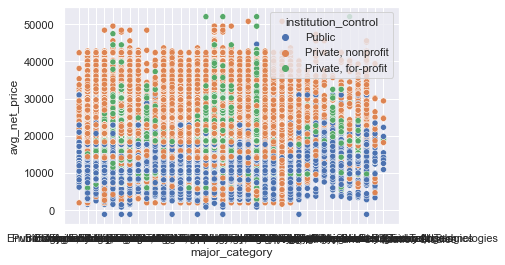

In [39]:
sns.scatterplot(explore_df["major_category"], explore_df["avg_net_price"], hue=explore_df["institution_control"])
plt.show()

In [40]:
explore_df.groupby('major_category').avg_net_price.value_counts().sort_values()

major_category                                              avg_net_price
Fine Arts                                                   17,188.00          1
Interdisciplinary and Multi-Disciplinary Studies (General)  19,036.00          1
                                                            18,906.00          1
                                                            18,905.00          1
                                                            18,889.00          1
                                                                            ... 
Medical and Health Sciences and Services                    22,961.00        104
Business                                                    22,961.00        118
Medical and Health Sciences and Services                    14,502.00        124
Computer and Information Sciences                           18,640.00        132
Business                                                    18,640.00        179
Name: avg_net_price, Length: 30293,

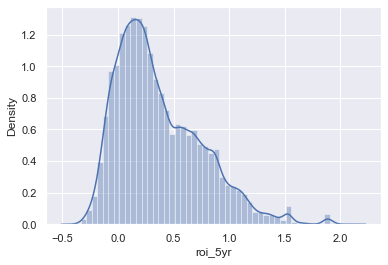

In [41]:
sns.distplot(explore_df['roi_5yr']) 
plt.show()

In [42]:
explore_df.roi_5yr.value_counts().sort_values()

-0.16      1
 0.21      1
 0.24      1
 0.41      1
 0.23      1
        ... 
 0.86     92
 0.44    109
 1.88    213
 0.87    299
 1.53    362
Name: roi_5yr, Length: 30287, dtype: int64

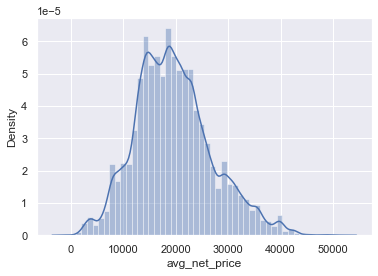

In [43]:
sns.distplot(explore_df['avg_net_price']) 
plt.show()

In [44]:
explore_df.full_time_net_tuition_revenue.value_counts()

10,873.00    158
18,384.00    142
29,309.00    138
17,912.00    136
 5,991.00    130
            ... 
 5,203.00      1
   908.00      1
 1,313.00      1
   846.00      1
   684.00      1
Name: full_time_net_tuition_revenue, Length: 2458, dtype: int64

In [45]:
explore_df.full_time_net_tuition_revenue.isnull().sum()

30

In [46]:
(explore_df['full_time_net_tuition_revenue']==0).sum()

115

In [47]:
explore_df.full_time_net_tuition_revenue.describe()

count              68,516.00
mean               13,882.58
std                11,850.51
min                     0.00
25%                 7,624.00
50%                12,245.00
75%                17,418.00
max               455,440.00
Name: full_time_net_tuition_revenue, dtype: float64

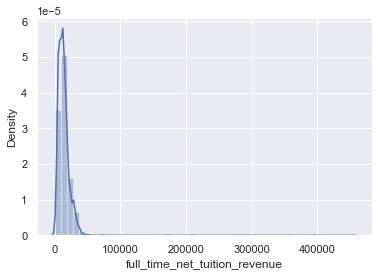

In [48]:
sns.distplot(explore_df['full_time_net_tuition_revenue']) 
plt.show()

In [49]:
explore_df.avg_faculty_salary.value_counts()

14,291.00    240
10,192.00    172
 8,377.00    170
 7,426.00    162
10,744.00    156
            ... 
 6,428.00      1
 9,500.00      1
10,599.00      1
 7,951.00      1
 9,751.00      1
Name: avg_faculty_salary, Length: 2153, dtype: int64

In [50]:
explore_df.avg_faculty_salary.isnull().sum()

808

In [51]:
(explore_df['avg_faculty_salary']==0).sum()

0

In [52]:
explore_df.avg_faculty_salary.describe()

count              67,738.00
mean                8,443.29
std                 2,585.69
min                   453.00
25%                 6,693.00
50%                 8,055.00
75%                 9,806.00
max                20,483.00
Name: avg_faculty_salary, dtype: float64

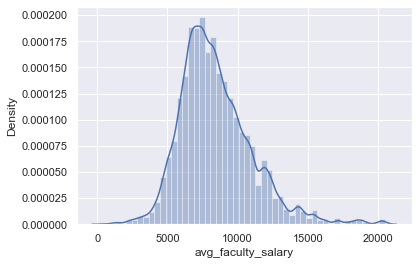

In [53]:
sns.distplot(explore_df['avg_faculty_salary']) 
plt.show()

# _______________________________________________________ #
### Debt Specific Questions
- `med_debt_pell_students`
- `median_debt_non_pell`
- `median_debt_completed`

In [54]:
explore_df.med_debt_pell_students.value_counts()

19500    2614
15000    2192
19000    1837
21500    1591
20500    1295
         ... 
3909        1
7300        1
10264       1
3750        1
8655        1
Name: med_debt_pell_students, Length: 971, dtype: int64

In [55]:
explore_df.med_debt_pell_students.isnull().sum()

1350

In [56]:
(explore_df['med_debt_pell_students']==0).sum()

0

In [57]:
explore_df.med_debt_pell_students.describe()

count     67196
unique      971
top       19500
freq       2614
Name: med_debt_pell_students, dtype: object

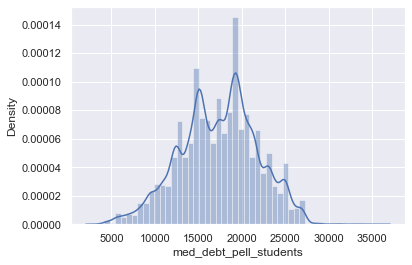

In [58]:
sns.distplot(explore_df['med_debt_pell_students']) 
plt.show()

In [59]:
explore_df.median_debt_non_pell.value_counts()

15000    4898
19500    3744
12000    3582
12500    3205
13000    2564
         ... 
5407        1
6625        1
7360        1
8334        1
3750        1
Name: median_debt_non_pell, Length: 797, dtype: int64

In [60]:
explore_df.median_debt_non_pell.isnull().sum()

1350

In [61]:
(explore_df['median_debt_non_pell']==0).sum()

0

In [62]:
explore_df.median_debt_non_pell.describe()

count     67196
unique      797
top       15000
freq       4898
Name: median_debt_non_pell, dtype: object

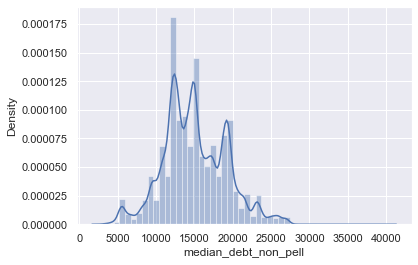

In [63]:
sns.distplot(explore_df['median_debt_non_pell']) 
plt.show()

In [64]:
explore_df.median_debt_completed.value_counts()

27000    7447
25000    4927
26000    2948
21500    1942
20500    1743
         ... 
30735       1
7877        1
26366       1
25750       1
11250       1
Name: median_debt_completed, Length: 956, dtype: int64

In [65]:
explore_df.median_debt_completed.isnull().sum()

1005

In [66]:
(explore_df['median_debt_completed']==0).sum()

0

In [67]:
explore_df.median_debt_completed.describe()

count     67541
unique      956
top       27000
freq       7447
Name: median_debt_completed, dtype: object

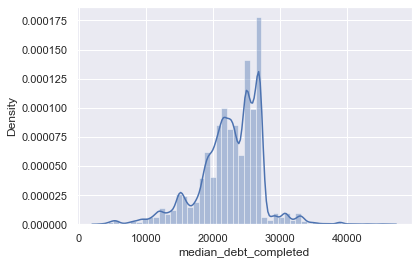

In [68]:
sns.distplot(explore_df['median_debt_completed']) 
plt.show()

# _______________________________________________________ #
### Admission Specific Questions
- `admission_rate`
- `ACT_score_mid`
- `avg_sat_admitted`
- `required_score`
- `share_of_part_time`

In [69]:
explore_df.admission_rate.value_counts()

1.00    287
0.78    203
0.69    191
0.49    189
0.84    168
       ... 
0.39      1
0.44      1
0.64      1
0.98      1
0.59      1
Name: admission_rate, Length: 1496, dtype: int64

In [70]:
explore_df.admission_rate.isnull().sum()

7173

In [71]:
(explore_df['admission_rate']==0).sum()

2

In [72]:
explore_df.admission_rate.describe()

count              61,373.00
mean                    0.66
std                     0.20
min                     0.00
25%                     0.56
50%                     0.69
75%                     0.81
max                     1.00
Name: admission_rate, dtype: float64

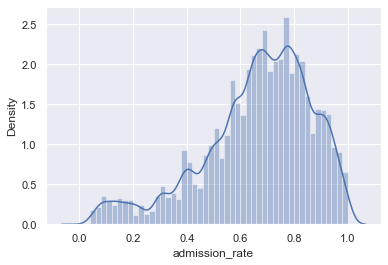

In [73]:
sns.distplot(explore_df['admission_rate']) 
plt.show()

In [74]:
explore_df.ACT_score_mid.value_counts()

23.00    7461
24.00    6422
22.00    6001
25.00    4837
21.00    4690
20.00    4035
26.00    3533
28.00    2323
27.00    1880
19.00    1843
29.00    1712
30.00    1591
32.00    1096
18.00    1014
34.00     997
31.00     938
33.00     933
17.00     381
16.00     149
15.00      73
35.00      61
36.00      26
Name: ACT_score_mid, dtype: int64

In [75]:
explore_df.ACT_score_mid.isnull().sum()

16550

In [76]:
(explore_df['ACT_score_mid']==0).sum()

0

In [77]:
explore_df.ACT_score_mid.describe()

count              51,996.00
mean                   24.19
std                     3.74
min                    15.00
25%                    22.00
50%                    24.00
75%                    26.00
max                    36.00
Name: ACT_score_mid, dtype: float64

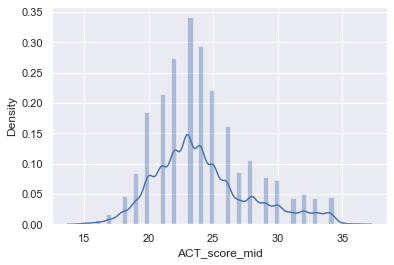

In [78]:
sns.distplot(explore_df['ACT_score_mid']) 
plt.show()

In [79]:
explore_df.avg_sat_admitted.value_counts()

1,120.00    888
1,105.00    561
1,133.00    554
1,135.00    463
1,050.00    414
           ... 
1,522.00      3
1,296.00      3
1,343.00      1
  908.00      1
1,476.00      1
Name: avg_sat_admitted, Length: 444, dtype: int64

In [80]:
explore_df.avg_sat_admitted.isnull().sum()

15796

In [81]:
(explore_df['avg_sat_admitted']==0).sum()

0

In [82]:
explore_df.avg_sat_admitted.describe()

count              52,750.00
mean                1,163.76
std                   124.43
min                   785.00
25%                 1,082.00
50%                 1,140.00
75%                 1,229.00
max                 1,566.00
Name: avg_sat_admitted, dtype: float64

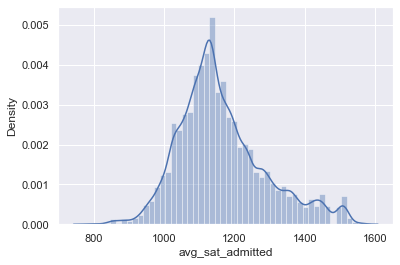

In [83]:
sns.distplot(explore_df['avg_sat_admitted']) 
plt.show()

In [84]:
explore_df.required_score.value_counts()

1.00    47941
5.00     5447
2.00     4609
3.00     3419
Name: required_score, dtype: int64

In [85]:
explore_df.required_score.isnull().sum()

7130

In [86]:
(explore_df['required_score']==0).sum()

0

In [87]:
explore_df.required_score.describe()

count              61,416.00
mean                    1.54
std                     1.19
min                     1.00
25%                     1.00
50%                     1.00
75%                     1.00
max                     5.00
Name: required_score, dtype: float64

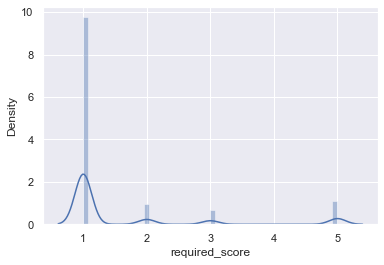

In [88]:
sns.distplot(explore_df['required_score']) 
plt.show()

In [89]:
explore_df.share_of_part_time.value_counts()

0.00    2040
0.07     235
0.04     233
0.08     222
0.06     210
        ... 
0.43       1
0.67       1
0.61       1
0.76       1
0.75       1
Name: share_of_part_time, Length: 1758, dtype: int64

In [90]:
explore_df.share_of_part_time.isnull().sum()

70

In [91]:
(explore_df['share_of_part_time']==0).sum()

2040

In [92]:
explore_df.share_of_part_time.describe()

count              68,476.00
mean                    0.14
std                     0.16
min                     0.00
25%                     0.03
50%                     0.09
75%                     0.18
max                     1.00
Name: share_of_part_time, dtype: float64

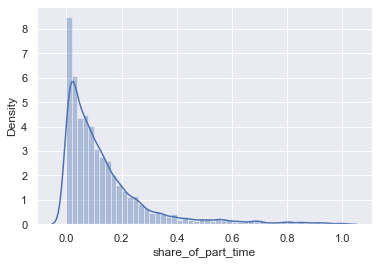

In [93]:
sns.distplot(explore_df['share_of_part_time']) 
plt.show()

<AxesSubplot:xlabel='roi_10yr', ylabel='full_time_net_tuition_revenue'>

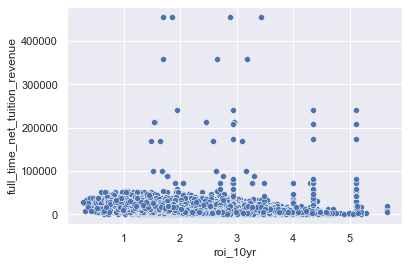

In [94]:
sns.scatterplot(explore_df["roi_10yr"], explore_df["full_time_net_tuition_revenue"])

<AxesSubplot:xlabel='roi_10yr', ylabel='avg_faculty_salary'>

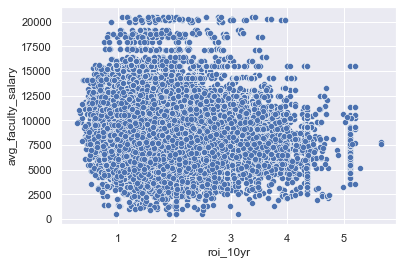

In [95]:
sns.scatterplot(explore_df["roi_10yr"], explore_df["avg_faculty_salary"])

Is there a relationship between avg_net_price and ROI_10yr?


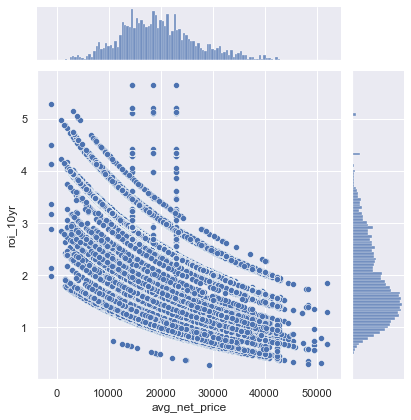

In [96]:
print("Is there a relationship between avg_net_price and ROI_10yr?")
sns.jointplot(x="avg_net_price", y="roi_10yr", data=explore_df)
plt.xlabel("Avg_net_price_per_institution")
plt.ylabel("ROI 10yr")
plt.show()

Is there a relationship between full_time_net_tuition_revenue and ROI_10yr?


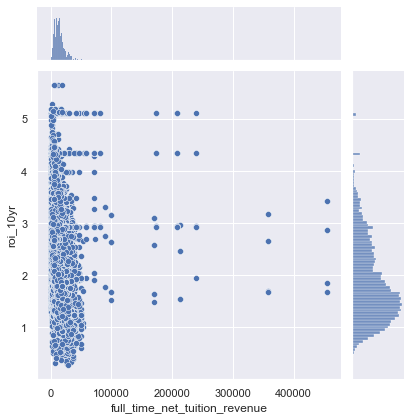

In [97]:
print("Is there a relationship between full_time_net_tuition_revenue and ROI_10yr?")
sns.jointplot(x="full_time_net_tuition_revenue", y="roi_10yr", data=explore_df)
plt.xlabel("Fill Time Net Tuition Revenue")
plt.ylabel("ROI 10yr")
plt.show()

Is there a relationship between avg_faculty_salary and ROI_10yr?


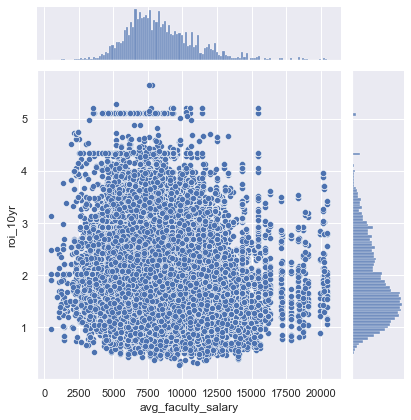

In [98]:
print("Is there a relationship between avg_faculty_salary and ROI_10yr?")
sns.jointplot(x="avg_faculty_salary", y="roi_10yr", data=explore_df)
plt.xlabel("Avg Faculty Salary")
plt.ylabel("ROI 10yr")
plt.show()

Is there a relationship between admission_rate and ROI_10yr?


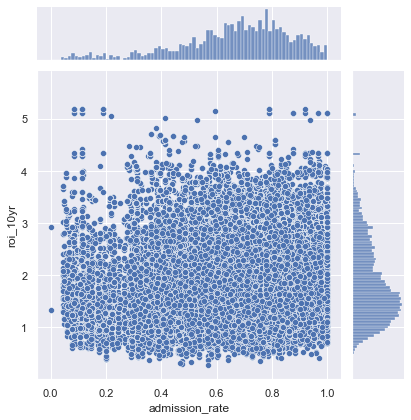

In [99]:
print("Is there a relationship between admission_rate and ROI_10yr?")
sns.jointplot(x="admission_rate", y="roi_10yr", data=explore_df)
plt.xlabel("Admission Rate")
plt.ylabel("ROI 10yr")
plt.show()

Is there a relationship between ACT_score_mid and ROI_10yr?


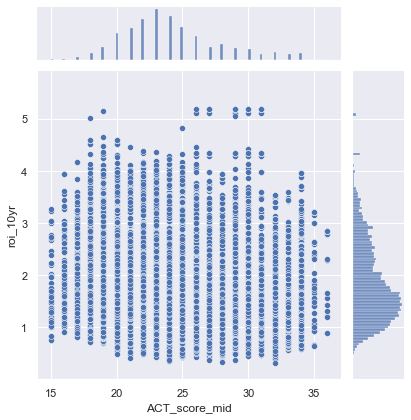

In [100]:
print("Is there a relationship between ACT_score_mid and ROI_10yr?")
sns.jointplot(x="ACT_score_mid", y="roi_10yr", data=explore_df)
plt.xlabel("Mid ACT score admitted")
plt.ylabel("ROI 10yr")
plt.show()

Is there a relationship between avg_sat_admitted and ROI_10yr?


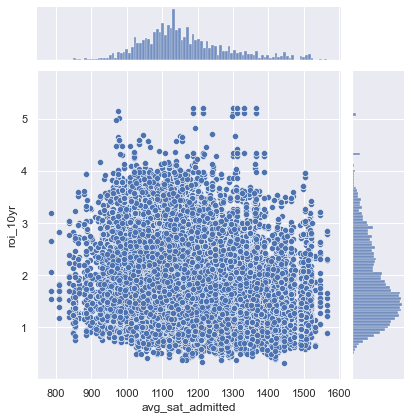

In [101]:
print("Is there a relationship between avg_sat_admitted and ROI_10yr?")
sns.jointplot(x="avg_sat_admitted", y="roi_10yr", data=explore_df)
plt.xlabel("Avg SAT score admitted")
plt.ylabel("ROI 10yr")
plt.show()

Is there a relationship between required_score and ROI_10yr?


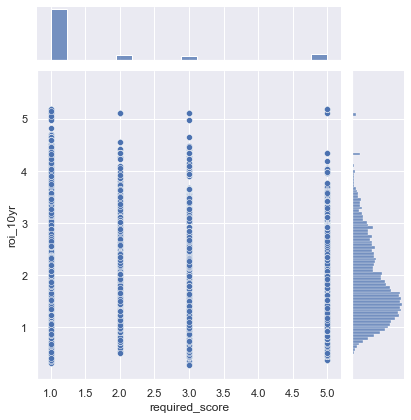

In [102]:
print("Is there a relationship between required_score and ROI_10yr?")
sns.jointplot(x="required_score", y="roi_10yr", data=explore_df)
plt.xlabel("Required Score (unsure which score)")
plt.ylabel("ROI 10yr")
plt.show()

Is there a relationship between share_of_part_time and ROI_10yr?


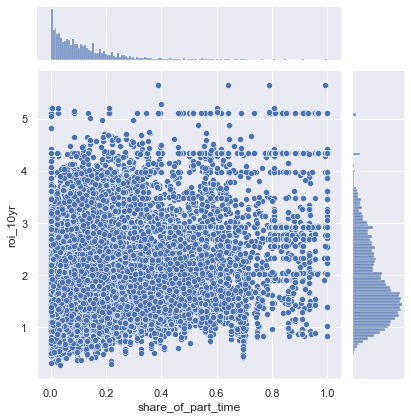

In [103]:
print("Is there a relationship between share_of_part_time and ROI_10yr?")
sns.jointplot(x="share_of_part_time", y="roi_10yr", data=explore_df)
plt.xlabel("Portion of part time students")
plt.ylabel("ROI 10yr")
plt.show()

# ___________________________________________________________________________________________________________ #
#### Manually Imputing Nulls for Debt vars

- `med_debt_pell_students`
- `median_debt_non_pell`
- `median_debt_completed`

In [86]:
explore_df.med_debt_pell_students.isnull().sum()

0

In [82]:
explore_df.median_debt_non_pell.isnull().sum()

1350

In [83]:
explore_df.median_debt_completed.isnull().sum()

1005

In [66]:
explore_df['med_debt_pell_students'].median()

17500.0

In [85]:
explore_df['med_debt_pell_students'] = np.where(explore_df['med_debt_pell_students'].isna(), 17500, explore_df['med_debt_pell_students'])

In [69]:
explore_df['median_debt_non_pell'].median()

14768.0

In [87]:
explore_df['median_debt_non_pell'] = np.where(explore_df['median_debt_non_pell'].isna(), 14768, explore_df['median_debt_non_pell'])

In [71]:
explore_df['median_debt_completed'].median()

23250.0

In [88]:
explore_df['median_debt_completed'] = np.where(explore_df['median_debt_completed'].isna(), 23250, explore_df['median_debt_completed'])

In [90]:
explore_df = explore_df.astype({'med_debt_pell_students': 'int64', 'median_debt_non_pell': 'int64', 'median_debt_completed': 'int64'})

# _______________________________________________________ #


### Variables to explore:

- `avg_net_price` (cannot use, tied to ROI target var)
- `full_time_net_tuition_revenue`
- `avg_faculty_salary`

- `admission_rate`
- `ACT_score_mid` (categorical, make bins)
- `avg_sat_admitted`
- `share_of_part_time` (seems not useful)

- `med_debt_pell_students`
- `median_debt_non_pell`
- `median_debt_completed`


In [47]:
train.avg_faculty_salary.isnull().sum()

0

In [48]:
train.ACT_score_mid.isnull().sum()

0

In [49]:
train.avg_sat_admitted.isnull().sum()

0

In [50]:
train.med_debt_pell_students.isnull().sum()

755

## Initial Hypothesis Questions

1. Is there a relationship between `avg_faculty_salary` and `roi_10yr`?

2. Is there a relationship between `admission_rate` and `roi_10yr`?

3. Is there a relationship between `ACT_score_mid` and `roi_10yr`?

4. Is there a relationship between `avg_sat_admitted` and `roi_10yr`?

5. Is there a relationship between `med_debt_pell_students` and `roi_10yr`?

6. Is there a relationship between `median_debt_non_pell` and `roi_10yr`?

7. Is there a relationship between `median_debt_completed` and `roi_10yr`?


# _______________________________________________________ #
### 1. Is there a relationship between `avg_faculty_salary` and `roi_10yr`?


Is there a relationship
between annual income and spending score?


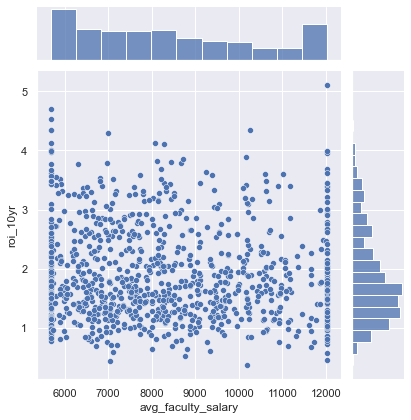

In [35]:
print("Is there a relationship\nbetween annual income and spending score?")
sns.jointplot(x="avg_faculty_salary", y="roi_10yr", data=train.sample(1000))
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()



In [ ]:
# create age bins for < 40 and >= 40 
train['age_bin'] = pd.cut(train.age, [0,40, 80])

train.head()

In [ ]:
# box plot of the two groups and spending score
sns.boxplot(train.age_bin, train.spending_score)
plt.show()

In [ ]:
# test the assumption of equal variance

stats.levene(train[train.age <= 40].spending_score, 
             train[train.age > 40].spending_score
            )

In [ ]:
# variances are unequal
# t-test, 2-sample (independent), 2-tail. 

stats.ttest_ind(train[train.age <= 40].spending_score, 
                train[train.age > 40].spending_score,
                equal_var=False
               )

**Findings** \


# _______________________________________________________ #
### 2. Is there a relationship between `admission_rate` and `roi_10yr`?


Is there a relationship
between annual income and spending score?


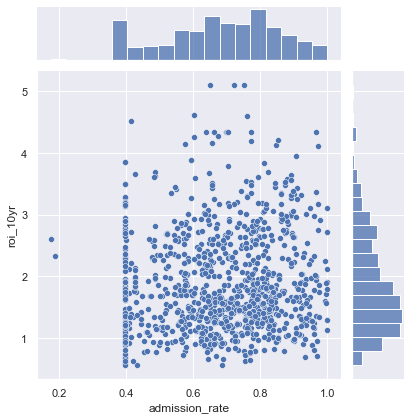

In [36]:
print("Is there a relationship\nbetween annual income and spending score?")
sns.jointplot(x="admission_rate", y="roi_10yr", data=train.sample(1000))
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

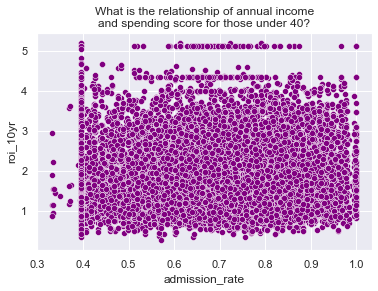

In [60]:
sns.scatterplot(x='admission_rate', y='roi_10yr', 
                data=train[train.avg_sat_admitted > 1050], 
                color='purple'
               )

plt.title("What is the relationship of annual income\nand spending score for those under 40?")
plt.show()

# _______________________________________________________ #
### 3. Is there a relationship between `ACT_score_mid` and `roi_10yr`?


Is there a relationship
between annual income and spending score?


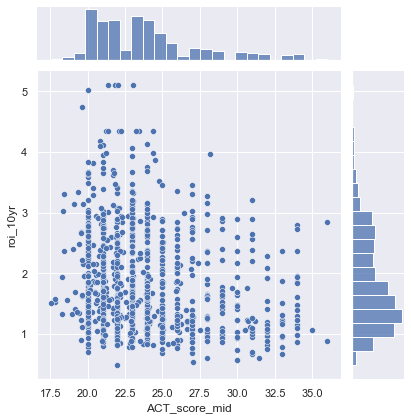

In [37]:
print("Is there a relationship\nbetween annual income and spending score?")
sns.jointplot(x="ACT_score_mid", y="roi_10yr", data=train.sample(1000))
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

In [38]:
# create age bins for < 40 and >= 40 
train['ACT_bin'] = pd.cut(train.ACT_score_mid, [0, 26, 32, 37])

train.head()

,unit_id_institution,college_name,institution_control,state_post_code,zip_code,city,region_ipeds,title_IV_eligibility,pred_degree,pred_degree_0and4,...,roi_10yr,pct_roi_10yr,roi_20yr,pct_roi_20yr,fam_income_0_30000,fam_income_30001_48000,fam_income_48001_75000,fam_income_75001_110000,fam_income_over_110000,ACT_bin
25656,"168,847.00",Baker College,"Private, nonprofit",MI,48867,Owosso,3.00,1.00,3.00,3.00,...,1.87,186.52,5.35,534.60,203.00,83.00,72.00,52.00,29.00,"(0, 26]"
28625,"216,852.00",Widener University,"Private, nonprofit",PA,19013-5792,Chester,2.00,1.00,3.00,3.00,...,1.94,193.77,5.56,555.86,79.00,64.00,100.00,137.00,269.00,"(0, 26]"
36032,"199,272.00",William Peace University,"Private, nonprofit",NC,27604-1194,Raleigh,5.00,1.00,3.00,3.00,...,1.44,143.99,4.43,443.45,57.00,28.00,27.00,33.00,36.00,"(0, 26]"
30254,"215,655.00",Robert Morris University,"Private, nonprofit",PA,15108-1189,Moon Township,2.00,1.00,3.00,3.00,...,1.00,100.32,3.46,345.63,109.00,86.00,148.00,152.00,226.00,"(0, 26]"
68185,"147,767.00",Northwestern University,"Private, nonprofit",IL,60208,Evanston,3.00,1.00,3.00,3.00,...,1.48,147.89,4.54,454.00,50.00,90.00,146.00,138.00,351.00,"(32, 37]"


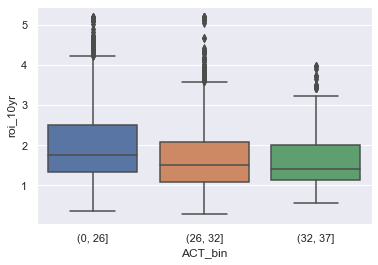

In [39]:
# box plot of the two groups and spending score
sns.boxplot(train.ACT_bin, train.roi_10yr)
plt.show()

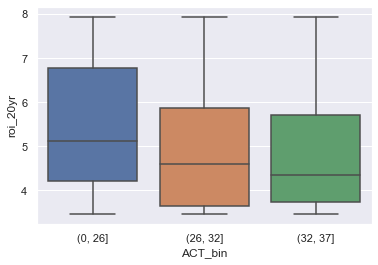

In [40]:
# box plot of the two groups and spending score
sns.boxplot(train.ACT_bin, train.roi_20yr)
plt.show()

In [42]:
# test the assumption of equal variance

stats.levene(train[train.ACT_score_mid <= 26].roi_10yr, 
             train[train.ACT_score_mid > 26].roi_10yr
            )

LeveneResult(statistic=74.91598603145049, pvalue=5.099338506233303e-18)

In [43]:
# test the assumption of equal variance

stats.levene(train[train.ACT_score_mid <= 32].roi_10yr, 
             train[train.ACT_score_mid > 32].roi_10yr
            )

LeveneResult(statistic=55.23012090282967, pvalue=1.0944049619735212e-13)

In [44]:
# variances are unequal
# t-test, 2-sample (independent), 2-tail. 

stats.ttest_ind(train[train.ACT_score_mid <= 32].roi_10yr, 
                train[train.ACT_score_mid > 32].roi_10yr,
                equal_var=False
               )

Ttest_indResult(statistic=15.181358845046494, pvalue=4.324863498589436e-48)

**Findings:** \
While there is not a linear relationship, there is a significant difference in ROI for ACT scores < 32 vs those >= 32.
Seems there may be an inverse relationship: as ACT scores increase, roi decreases???

# _______________________________________________________ #
### 4. Is there a relationship between `avg_sat_admitted` and `roi_10yr`?



Is there a relationship
between annual income and spending score?


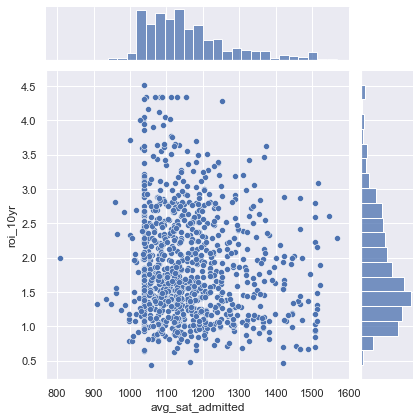

In [45]:
print("Is there a relationship\nbetween annual income and spending score?")
sns.jointplot(x="avg_sat_admitted", y="roi_10yr", data=train.sample(1000))
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

In [46]:
# create age bins for < 40 and >= 40 
train['SAT_bins'] = pd.cut(train.avg_sat_admitted, [0, 1050, 1300, 1600])

train.head()

,unit_id_institution,college_name,institution_control,state_post_code,zip_code,city,region_ipeds,title_IV_eligibility,pred_degree,pred_degree_0and4,...,pct_roi_10yr,roi_20yr,pct_roi_20yr,fam_income_0_30000,fam_income_30001_48000,fam_income_48001_75000,fam_income_75001_110000,fam_income_over_110000,ACT_bin,SAT_bins
25656,"168,847.00",Baker College,"Private, nonprofit",MI,48867,Owosso,3.00,1.00,3.00,3.00,...,186.52,5.35,534.60,203.00,83.00,72.00,52.00,29.00,"(0, 26]","(1050, 1300]"
28625,"216,852.00",Widener University,"Private, nonprofit",PA,19013-5792,Chester,2.00,1.00,3.00,3.00,...,193.77,5.56,555.86,79.00,64.00,100.00,137.00,269.00,"(0, 26]","(1050, 1300]"
36032,"199,272.00",William Peace University,"Private, nonprofit",NC,27604-1194,Raleigh,5.00,1.00,3.00,3.00,...,143.99,4.43,443.45,57.00,28.00,27.00,33.00,36.00,"(0, 26]","(0, 1050]"
30254,"215,655.00",Robert Morris University,"Private, nonprofit",PA,15108-1189,Moon Township,2.00,1.00,3.00,3.00,...,100.32,3.46,345.63,109.00,86.00,148.00,152.00,226.00,"(0, 26]","(1050, 1300]"
68185,"147,767.00",Northwestern University,"Private, nonprofit",IL,60208,Evanston,3.00,1.00,3.00,3.00,...,147.89,4.54,454.00,50.00,90.00,146.00,138.00,351.00,"(32, 37]","(1300, 1600]"


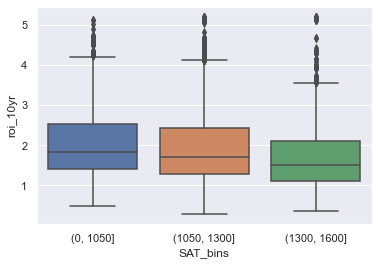

In [51]:
# box plot of the two groups and spending score
sns.boxplot(train.SAT_bins, train.roi_10yr)
plt.show()

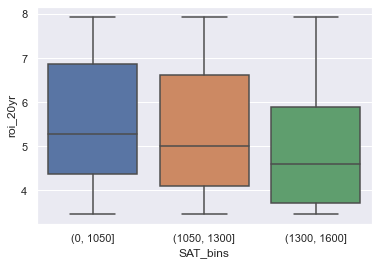

In [52]:
# box plot of the two groups and spending score
sns.boxplot(train.SAT_bins, train.roi_20yr)
plt.show()

In [53]:
# test the assumption of equal variance

stats.levene(train[train.avg_sat_admitted <= 1050].roi_10yr, 
             train[train.avg_sat_admitted > 1050].roi_10yr
            )

LeveneResult(statistic=0.987801134788734, pvalue=0.32028665621058916)

In [54]:
# test the assumption of equal variance

stats.levene(train[train.avg_sat_admitted <= 1300].roi_10yr, 
             train[train.avg_sat_admitted > 1300].roi_10yr
            )

LeveneResult(statistic=42.77716584496491, pvalue=6.211324883118799e-11)

In [56]:
# variances are unequal
# t-test, 2-sample (independent), 2-tail. 

stats.ttest_ind(train[train.avg_sat_admitted <= 1050].roi_10yr, 
                train[train.avg_sat_admitted > 1050].roi_10yr,
                equal_var=True
               )

Ttest_indResult(statistic=12.497725200102415, pvalue=9.019147158244607e-36)

**Findings:** \
While there is not a linear relationship, there is a significant difference in ROI for SAT scores <1050 vs those >= 1050.
Seems there may be an inverse relationship: as SAT scores increase, roi decreases???

# _______________________________________________________ #
### 5. Is there a relationship between `med_debt_pell_students` and `roi_10yr`?


# _______________________________________________________ #
### 6. Is there a relationship between `median_debt_non_pell` and `roi_10yr`?


# _______________________________________________________ #
### 7. Is there a relationship between `median_debt_completed` and `roi_10yr`?

In [104]:
# Define function which plots a categorical and continuous var
def plot_categorical_and_continuous_vars(df, categorical, continuous):
    df_sample = df.sample(2000)
    plt.figure()
    sns.countplot(x=categorical, data=df_sample)
    plt.figure()
    sns.swarmplot(x=categorical, y=continuous, data=df_sample)
    plt.figure()
    sns.boxplot(x=categorical, y=continuous, data=df_sample)
    plt.figure()
    sns.violinplot(x=categorical, y=continuous, data=df_sample)
    plt.figure()
    sns.barplot(x=categorical, y=continuous, data=df_sample)